In [1]:
import cv2

In [38]:
img1 = cv2.imread('course material/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_orig = img1.copy()

img2 = cv2.imread('course material/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_orig = img2.copy()

In [39]:
import matplotlib.pyplot as plt

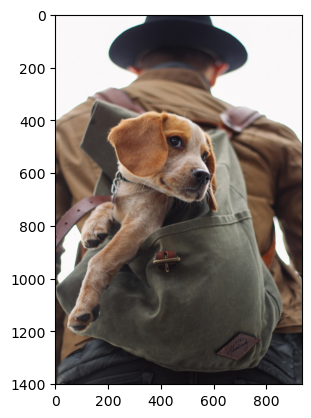

In [40]:
plt.imshow(img1)

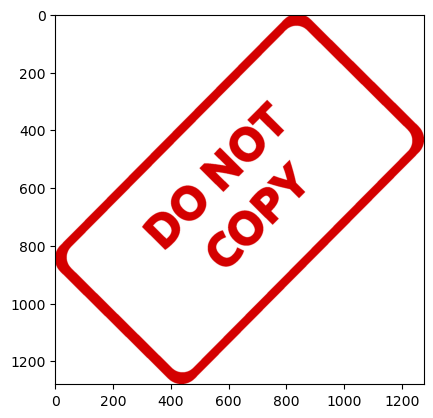

In [41]:
plt.imshow(img2)

In [42]:
img1.shape

(1401, 934, 3)

In [43]:
img2.shape

(1280, 1277, 3)

In [44]:
# Bleding images of the same size

In [45]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

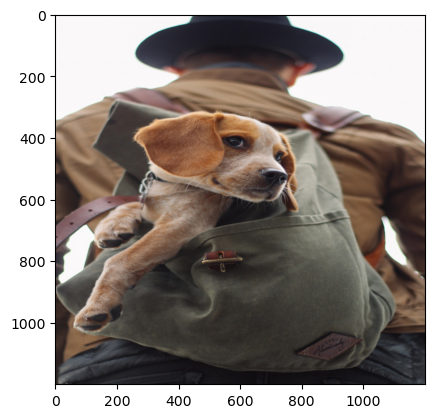

In [46]:
plt.imshow(img1)

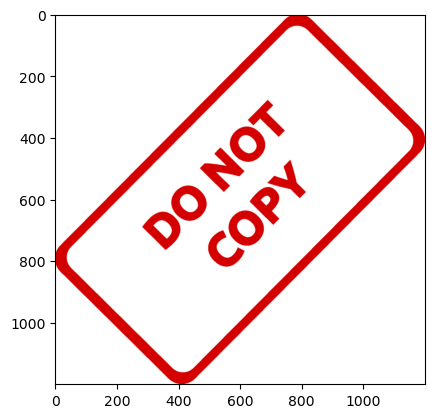

In [47]:
plt.imshow(img2)

In [48]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.1,gamma=0)

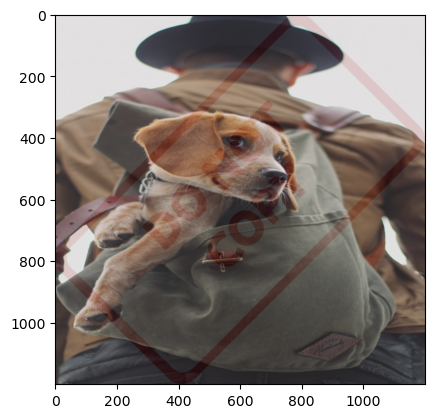

In [49]:
plt.imshow(blended)

In [50]:
# Overlay small image on top of a larger image (no bleding)
### Numpy reassignment

In [51]:
img1 = img1_orig.copy()
img2 = img2_orig.copy()

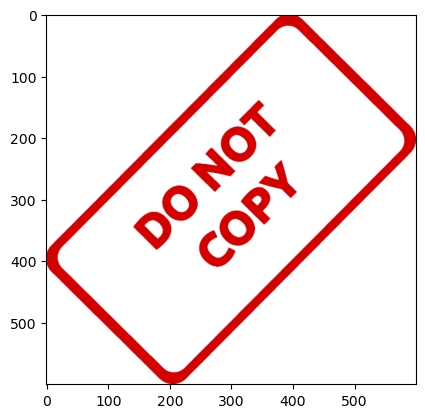

In [53]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

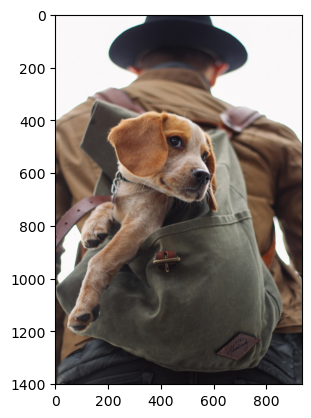

In [55]:
plt.imshow(img1)

In [56]:
large_img = img1
small_img = img2

In [58]:
### where start to put the image
x_offset = 0
y_offset = 0

In [59]:
x_end = x_offset + small_img.shape[1] #get X
y_end = y_offset + small_img.shape[0] #get Y

In [60]:
type(large_img)

numpy.ndarray

In [61]:
### remember numpy use Y*X but the normal is use X*Y, so we inverte bellow
large_img[y_offset:y_end,x_offset:x_end] = small_img

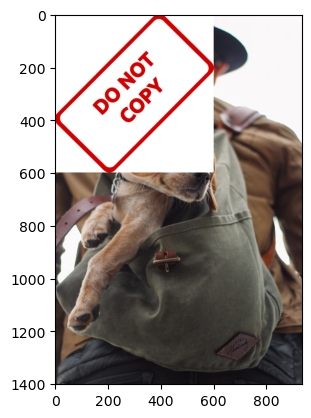

In [62]:
plt.imshow(large_img)

In [64]:
# Blend together images from diferent sizes
img1 = img1_orig.copy()
img2 = img2_orig.copy()
img2 = cv2.resize(img2,(600,600))

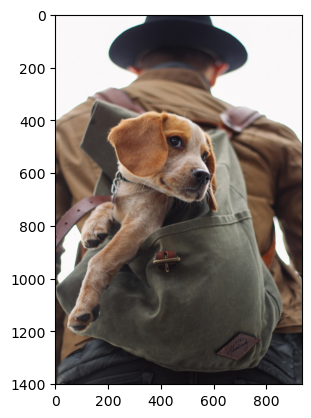

In [66]:
plt.imshow(img1)

In [67]:
img1.shape

(1401, 934, 3)

In [68]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

In [69]:
img2.shape

(600, 600, 3)

In [71]:
rows, cols, channels = img2.shape
rows

600

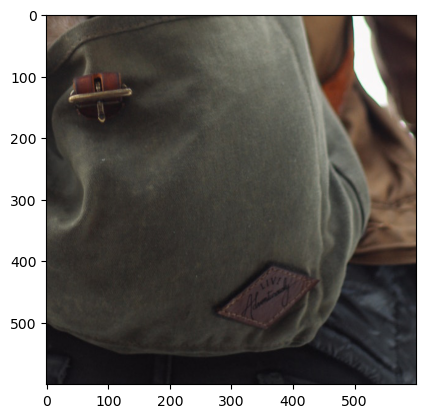

In [74]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]]
plt.imshow(roi)

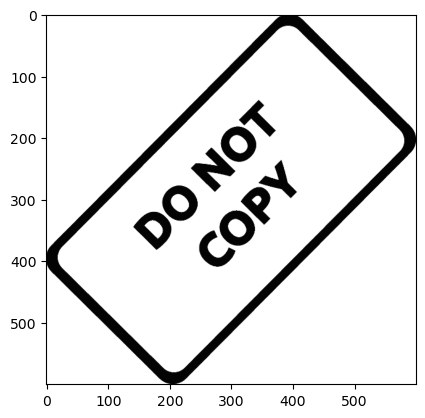

In [76]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap='gray')

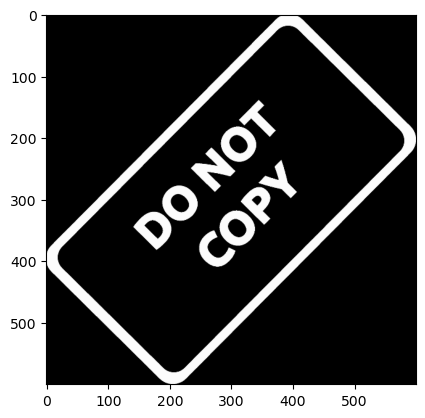

In [77]:
mask_inv = cv2.bitwise_not(img2gray) #invert inputs
plt.imshow(mask_inv,cmap='gray')

In [78]:
mask_inv.shape

(600, 600)

In [79]:
import numpy as np

In [83]:
white_background = np.full(img2.shape,255,dtype=np.uint8) #fill all with 255, so all white
white_background.shape

(600, 600, 3)

In [84]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

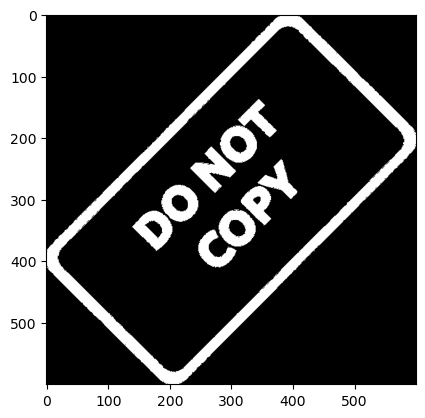

In [88]:
#why use bitwise? in case to have more colors, blending must cosider contrast of both images, not so much usefull for black/white images or less colors
#like this case
background = cv2.bitwise_or(white_background, white_background, mask=mask_inv) #disjunction of two arrays
plt.imshow(background)

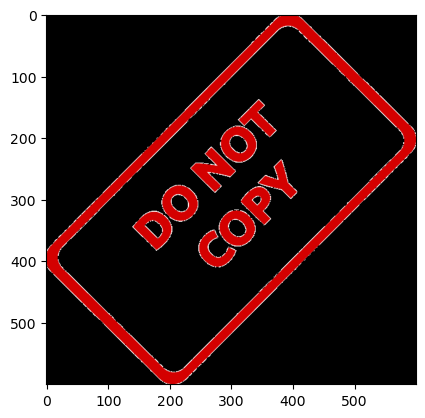

In [89]:
foreground = cv2.bitwise_or(img2, img2, mask=mask_inv) #now add the mast to the image
plt.imshow(foreground)

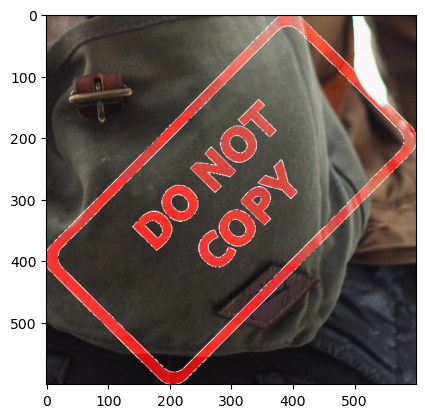

In [90]:
final_roi = cv2.bitwise_or(roi,foreground)
plt.imshow(final_roi)

In [91]:
large_img = img1
small_img = final_roi

In [96]:
small_img[1]

array([[121, 102,  88],
       [125, 106,  92],
       [123, 104,  89],
       ...,
       [ 47,  32,  29],
       [ 47,  32,  29],
       [ 47,  32,  29]], dtype=uint8)

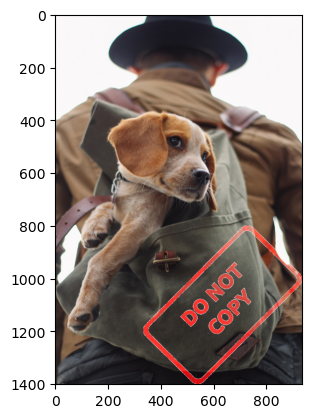

In [97]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)